In [4]:
import numpy as np
import sympy as smp
import scipy as sp
import matplotlib.pyplot as plt

## Monte Carlo 

* The purpose of Monte Carlo is to simulate a real life experiment that depends on randomness to some extent.

* For most cases this boils down into two steps

$\hspace{1cm}$ 1: Generate Random Variables According to a Distribution $\\$
$\hspace{1cm}$ 2: Use These Random Variables to Conduct Some Experiment

### 1: Generate Random Variables According to a Distribution

1.1 **Inverting the CDF Analytically**

**Theorem**: If a random variable $X$ has a CDF of $F(x)$ then the variable $F^{-1}(U)$, where $U$ is a random uniform variable between 0 and 1, also has CDF $F(x)$

$$X \sim F(x) \implies F^{-1}(U) \sim F(x)$$

**Example 01**: 

* The exponential distribution is

$$f(x) = \lambda e^{-\lambda x} \implies F(x) = 1-e^{-\lambda x}$$

* Using $F[F^{-1}(x)]=x$ We get

$$1-e^{-\lambda F^{-1}(x)} = x \implies \boxed{F^{-1}(x) = -\frac{\ln(1-x)}{\lambda}}$$

* So if we evaluate a bunch of random uniform variables $U$ and evaluate $F^{-1}(U)$, they should be distributed according to $f(x)$ above

In [5]:
# define function and its CDF (with lambda =2)
x = np.linspace(0,3,100)
f = 2*np.exp(-2*x)
F = 1 - np.exp(-2*x)

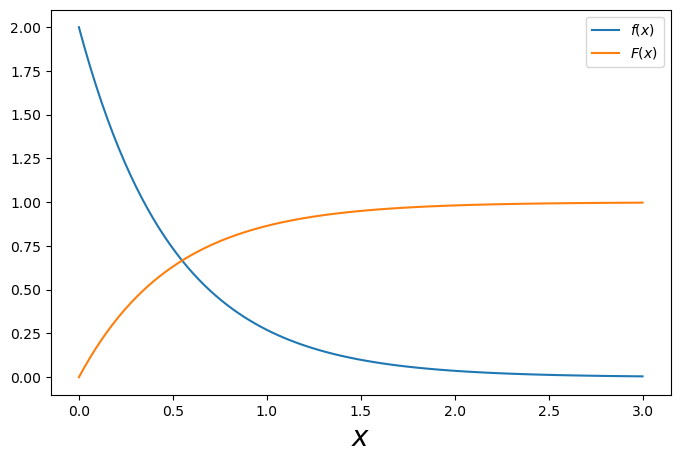

In [6]:
# plot 
plt.figure(figsize=(8,5))
plt.plot(x, f, label=r'$f(x)$')
plt.plot(x,F, label=r'$F(x)$')
plt.legend()
plt.xlabel('$x$', fontsize=20)
plt.legend()
plt.show()

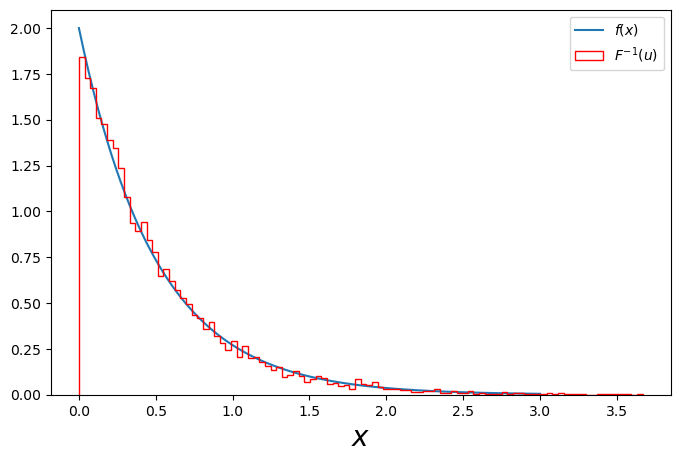

In [7]:
Us = np.random.rand(10000)
F_inv_Us = -np.log(1-Us)/2   # here lamda = 2 

# plot

plt.figure(figsize=(8,5))
plt.plot(x, f, label=r'$f(x)$')
plt.hist(F_inv_Us, histtype='step', color='red', density='norm', bins=100, label='$F^{-1}(u)$')
plt.legend()
plt.xlabel('$x$', fontsize=20)
plt.legend()
plt.show()


**Example 02 :  For functions that are hard to inverse (we can utilize Search Sort Algorithm)**

* Sometimes $F(x)$ isn't invertible analystically. BUT

* $F(x)$ is always increasing with $x$

* So it is necessarily invertible (there just might not be a formula for it).

$$f(x) = F_1e^{-\sqrt{x/E_1}} + F_2e^{-\sqrt{x/E_2}}$$

In [8]:
# define the function (we want to generate random data according to this)

x,y,F1,F2,E1,E2 = smp.symbols('x y F1 F2 E1 E2',real=True,positive=True) # here y is the integration upper limit 
fs = F1 * smp.exp(-smp.sqrt(x/E1))  + F2*smp.exp(-smp.sqrt(x/E2))        # function (or distribution)
fs

F1*exp(-sqrt(x)/sqrt(E1)) + F2*exp(-sqrt(x)/sqrt(E2))

In [9]:
Fs = smp.integrate(fs,(x,0,y))                                         # intergrate the above fucntion to get CDF 
Fs

2*E1*F1 + 2*E2*F2 + F1*(-2*sqrt(E1)*sqrt(y)*exp(-sqrt(y)/sqrt(E1)) - 2*E1*exp(-sqrt(y)/sqrt(E1))) + F2*(-2*sqrt(E2)*sqrt(y)*exp(-sqrt(y)/sqrt(E2)) - 2*E2*exp(-sqrt(y)/sqrt(E2)))

In [10]:
# convert symbolic functions to numpy functions 
fn = smp.lambdify((x,E1,E2,F1,F2),fs)
Fn = smp.lambdify((y,E1,E2,F1,F2),Fs)

In [11]:
# define constants and eveluate the f and F in x domain 
E1 = E2 = 0.2
F1 = 1.3
F2 = 1.4
x = np.linspace(0,5,1000)
f = fn(x, E1, E2, F1, F2)
F = Fn(x, E1, E2, F1, F2)

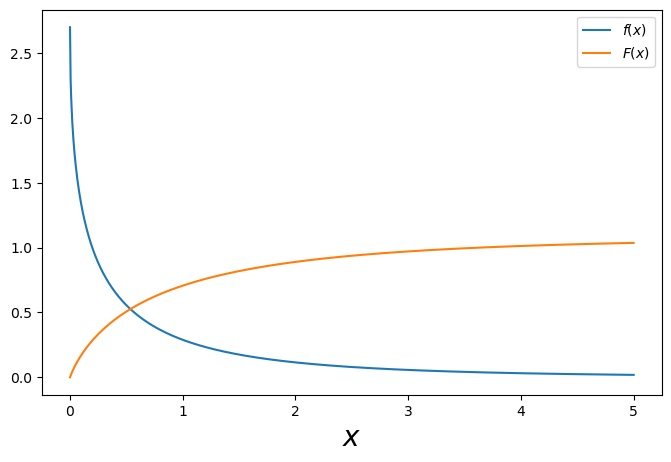

In [12]:
# plot
plt.figure(figsize=(8,5))
plt.plot(x, f, label=r'$f(x)$')
plt.plot(x,F, label=r'$F(x)$')
plt.legend()
plt.xlabel('$x$', fontsize=20)
plt.legend()
plt.show()

In [13]:
# get the F inverse 
F_inv_Us = x[np.searchsorted(F[:-1],Us)]

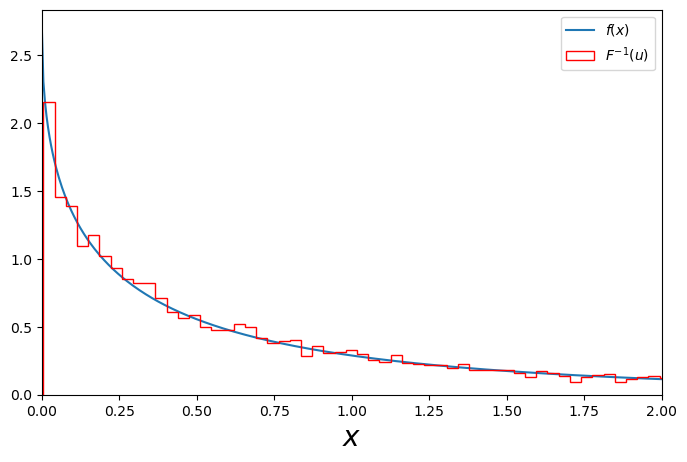

In [14]:
plt.figure(figsize=(8,5))
plt.plot(x, f, label=r'$f(x)$')
plt.hist(F_inv_Us, histtype='step', color='red', density='norm', bins=100, label='$F^{-1}(u)$')
plt.legend()
plt.xlabel('$x$', fontsize=20)
plt.legend()
plt.xlim(0,2)
plt.show()

**Example 3: More advanced problem**

* particles are emitted according to poison distribution 

* energy of emitted particles are distributed according to the distribution explained in the ***example 2***

* we want to find the how the energy deposited in detector 

In [15]:
# part 1: Particles are emitted with poison distribution with mean 4 (this is for number of particles)

N = 1000000                          # number of measurements (or measurements trials)
X = np.random.poisson(lam=4,size=N)  # no of particles detected at each experiment 
X[:10]                               # display how many particles detected at first 10 trials 

array([1, 4, 5, 6, 5, 6, 5, 4, 6, 5])

In [16]:
# Part 2: Energy distribution of particles emitted (number of particles are from part 1)
x = np.linspace(0,5,1000)           # energy range of particles[0-5 MeV]
F = Fn(x, E1, E2, F1, F2)           # particles have this energy distribution 
Us = np.random.rand(X.sum())        # total number of particles emitted (across all trials)
E = x[np.searchsorted(F[:-1], Us)]  # energy of each particles emitted (this will be distributed according to fn defined earlier)     

In [17]:
idx = np.insert(X.cumsum(),0,0)[:-1] # total number of particles detected up to each trial (10 s intervals)
idx[:10]

array([ 0,  1,  5, 10, 16, 21, 27, 32, 36, 42])

In [18]:
E[:10]                               # energy of first 10 particles

array([0.18018018, 2.45245245, 1.1961962 , 0.29029029, 0.30530531,
       0.35535536, 0.03003003, 0.7007007 , 1.4014014 , 0.57057057])

In [19]:
E_10s = np.add.reduceat(E,idx)      # get the energy deposited at each 10s intervals 
# if you need more help on np.add.reducea: https://stackoverflow.com/questions/24333296/what-is-the-meaning-of-numpy-reduceat-in-python/62970889#62970889

In [20]:
E_10s

array([0.18018018, 4.24424424, 3.05805806, ..., 0.80580581, 4.64964965,
       0.41541542])

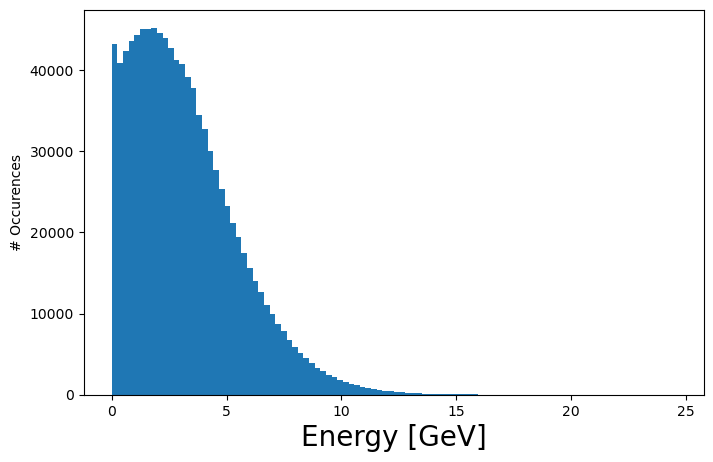

In [21]:
# plot 
plt.figure(figsize=(8,5))
plt.hist(E_10s, bins=100)
plt.xlabel('Energy [GeV]', fontsize=20)
plt.ylabel('# Occurences')
plt.show()